In [1]:
import molmap

RDKit WARNING: [17:38:24] Enabling RDKit 2019.09.2 jupyter extensions


## Hyper parameters setting

In [2]:
metric = 'cosine'
method = 'umap'
n_neighbors = 30
min_dist = 0.1

# 1.descriptor map

In [3]:
mp_name = './descriptor.mp'
mp1 = molmap.MolMap(ftype = 'descriptor', metric = metric, flist = [])
mp1.fit(method = method, n_neighbors = n_neighbors, min_dist = min_dist)
mp1.save(mp_name) ### save it as a featurizer

UMAP(metric='precomputed', n_neighbors=30, random_state=1, verbose=2)
Construct fuzzy simplicial set
Wed Jun 30 17:38:27 2021 Finding Nearest Neighbors
Wed Jun 30 17:38:27 2021 Finished Nearest Neighbor Search
Wed Jun 30 17:38:30 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Jun 30 17:38:35 2021 Finished embedding
2021-06-30 17:38:35,293 - INFO - [bidd-molmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2021-06-30 17:38:37,718 - INFO - [bidd-molmap] - Finished


['./descriptor.mp']

In [4]:
mp1.plot_scatter(htmlpath='./images/')

2021-06-30 17:38:37,982 - INFO - [bidd-molmap] - generate file: ./images/descriptor_1344_cosine_umap_scatter
2021-06-30 17:38:38,027 - INFO - [bidd-molmap] - save html file to ./images/descriptor_1344_cosine_umap_scatter


In [5]:
mp1.plot_grid(htmlpath='./images/')

2021-06-30 17:38:38,158 - INFO - [bidd-molmap] - generate file: ./images/descriptor_1344_cosine_umap_molmap
2021-06-30 17:38:38,199 - INFO - [bidd-molmap] - save html file to ./images/descriptor_1344_cosine_umap_molmap


# 2.fingerprint map

In [6]:
mp_name = 'fingerprint.mp'
bitsinfo = molmap.feature.fingerprint.Extraction().bitsinfo
flist = bitsinfo[bitsinfo.Subtypes.isin(['MACCSFP', 'PharmacoErGFP','PubChemFP'])].IDs.tolist()
mp2 = molmap.MolMap(ftype = 'fingerprint', metric = metric, flist = flist)
mp2.fit(method = method, n_neighbors = n_neighbors, min_dist = min_dist)
mp2.save(mp_name) ## save it as a featurizer

UMAP(metric='precomputed', n_neighbors=30, random_state=1, verbose=2)
Construct fuzzy simplicial set
Wed Jun 30 17:38:42 2021 Finding Nearest Neighbors
Wed Jun 30 17:38:42 2021 Finished Nearest Neighbor Search
Wed Jun 30 17:38:42 2021 Construct embedding
	completed  0  /  500 epochs
	completed  50  /  500 epochs
	completed  100  /  500 epochs
	completed  150  /  500 epochs
	completed  200  /  500 epochs
	completed  250  /  500 epochs
	completed  300  /  500 epochs
	completed  350  /  500 epochs
	completed  400  /  500 epochs
	completed  450  /  500 epochs
Wed Jun 30 17:38:46 2021 Finished embedding
2021-06-30 17:38:46,296 - INFO - [bidd-molmap] - Applying grid feature map(assignment), this may take several minutes(1~30 min)
2021-06-30 17:38:49,718 - INFO - [bidd-molmap] - Finished


['fingerprint.mp']

In [7]:
mp2.plot_scatter('./images/')

2021-06-30 17:38:49,799 - INFO - [bidd-molmap] - generate file: ./images/fingerprint_1303_cosine_umap_scatter
2021-06-30 17:38:49,838 - INFO - [bidd-molmap] - save html file to ./images/fingerprint_1303_cosine_umap_scatter


In [8]:
mp2.plot_grid(htmlpath='./images/')

2021-06-30 17:38:50,019 - INFO - [bidd-molmap] - generate file: ./images/fingerprint_1303_cosine_umap_molmap
2021-06-30 17:38:50,062 - INFO - [bidd-molmap] - save html file to ./images/fingerprint_1303_cosine_umap_molmap


# 3.featurizer

In [9]:
smiles1 = 'CC(=O)OC1=CC=CC=C1C(O)=O' #aspirin
smiles2 = 'CC(=O)NC1=CC=CC=C1C(O)=O' #N‐acetylanthranilic acid

In [10]:
X1 = mp1.batch_transform([smiles1, smiles2])
X2 = mp2.batch_transform([smiles1, smiles2])

100%|##########| 2/2 [00:00<00:00, 2469.42it/s]


In [11]:
import matplotlib.pyplot as plt
%matplotlib inline

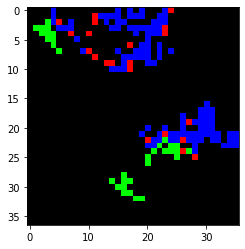

In [12]:
plt.imshow(X2[0])

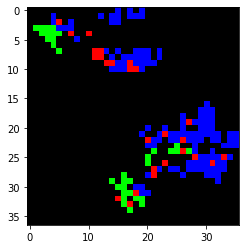

In [13]:
plt.imshow(X2[1])

In [14]:
mp1._S.channels, mp2._S.channels

(['Autocorr',
  'Charge',
  'Connectivity',
  'Constitution',
  'Estate',
  'Fragment',
  'InfoContent',
  'Kappa',
  'MOE',
  'Matrix',
  'Path',
  'Property',
  'Topology'],
 ['MACCSFP', 'PharmacoErGFP', 'PubChemFP'])

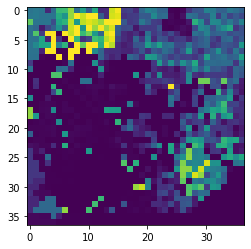

In [15]:
plt.imshow(X1[0].sum(axis=-1))

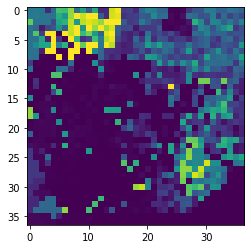

In [16]:
plt.imshow(X1[1].sum(axis=-1))